# **Data Public Transportation Transaction Transjakarta**

## **Latar Belakang**

TransJakarta adalah salah satu operator layanan transportasi publik terkemuka di Jakarta, yang mengoperasikan sistem Bus Rapid Transit (BRT). Dalam upaya untuk meningkatkan pendapatan dari pemasangan iklan di tiap halte, TransJakarta ingin merekrut seorang data analyst. Data analyst ini akan bertugas untuk menganalisis, dan menyajikan data terkait dengan persebaran penumpang serta penggunaan kartu berdasarkan corridor,gender,dan range Age.

### **Pernyataan Masalah**

Perusahaan Transjakarta ingin mengetahui persebaran banyaknya penumpang berdasarkan rute dan waktu melalui data yang ada pada bulan April. Informasi ini akan membantu perusahaan untuk **meningkatkan pendapatan melalui pemasangan iklan**

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana hubungan data penumpang dengan penggunaan kartu bank dalam meningkatkan pendapatan dari pemasangan iklan di setiap halte TransJakarta**

## **Data**

In [145]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

Data set ini berisi informasi terkait tentang Corridor,Jurusan,dan Card pembayaran yang digunakan oleh penumpang Transjakarta yang nanti dapat kita analisa untuk melihat persebaran Card pembayaran dari berbagai jurusan dan Corridor.  
Terdapat 22 kolom pada dataset Transjakarta ini yaitu :

- transID: ID unik transaksi untuk setiap transaksi.
- payCardID: Identifikasi utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket masuk dan keluar.
- payCardBank: Nama penerbit bank kartu pelanggan.
- payCardName: Nama pelanggan yang terdapat di dalam kartu.
- payCardSex: Jenis kelamin pelanggan yang terdapat di dalam kartu.
- payCardBirthDate: Tahun kelahiran pelanggan.
- corridorID: ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
- corridorName: Nama Koridor / Nama Rute yang berisi titik awal dan akhir untuk setiap rute.
- direction: 0 untuk Pergi, 1 untuk Kembali. Arah rute.
- tapInStops: ID Titik Tap In (masuk) untuk mengidentifikasi nama halte.
- tapInStopsName: Nama Halte Titik Tap In di mana pelanggan melakukan tap masuk.
- tapInStopsLat: Garis lintang Halte Titik Tap In.
- tapInStopsLon: Garis bujur Halte Titik Tap In.
- stopStartSeq: Urutan berhenti, mulai dari yang pertama, kedua, dst. Terkait dengan arah.
- tapInTime: Waktu tap masuk. Tanggal dan waktu.
- tapOutStops: ID Titik Tap Out (keluar) untuk mengidentifikasi nama halte.
- tapOutStopsName: Nama Halte Titik Tap Out di mana pelanggan melakukan tap keluar.
- tapOutStopsLat: Garis lintang Halte Titik Tap Out.
- tapOutStopsLon: Garis bujur Halte Titik Tap Out.
- stopEndSeq: Urutan berhenti, mulai dari yang pertama, kedua, dst. Terkait dengan arah.
- tapOutTime: Waktu tap keluar. Tanggal dan waktu.
- payAmount: Jumlah yang dibayar oleh pelanggan. Beberapa gratis. Beberapa tidak.

Berikut adalah 5 baris teratas dan terbawah pada dataset Transjakarta :

In [146]:
df = pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## **Data Understanding & Cleansing**

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [147]:
# Menampilkan informasi terkait :
# Nama kolom,Jumlah Kolom,Type Data,dan informasi lainnya
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()     

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [148]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [149]:
df.describe(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [150]:
# Data Unique pada tiap kolom
pd.set_option('display.max_colwidth',None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Secara umum kita dapat melihat bahwa : 

- Data Transjakarta memiliki 22 kolom dan 37900 baris
- Data diatas adalah data yang terjadi pada bulan April 2023
- Terdapat beberapa missing value ada kolom `corridorID`,`corridorName`,`tapInStops`,`payAmount`,
`tapOutStops`,`tapOutStopsName`,`tapOutTime`,Yand diwakili oleh NaN,untuk kolom yang terdapa missing value kita dapat mengeksekusinya lebih lanjut
- Untuk `tapOutStopsLat`,`tapOutStopsLon`,`tapInStopsLon`,`tapInStopsLat`,`direction`,`transID`,`payCardID`,`payCardName`,Kita dapat mengdrop kolom tersebut karena tidak memiliki relevansi terhadap hal yang akan kita analisis
- Terdapat 6 unique value pada kolom `payCardBank` yang nanti akan kita melihat persebarannya diberbagai halte.
- Kolom `tapInTime` dan `tapOutTime` berisi kan type data object yang seharusnya kolom ini berisikan type data Numeric
- beberapa data kategorik ordinal, bisa dibuatkan kolom baru berdasarkan ranking kategorinya untuk memudahkan analisis (opsional) 


### **Missing Value**

In [151]:
# Persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

Secara garis besar:  
* *missing value* `tapOutStopsLat`,`tapOutStopsLon`,`stopEndSeq`,`tapOutTime`,`tapOutStopsName`, Karena memiliki proporsi dengan persentase missing value yang sama kita dapat mengasumsikan bahwa jika salah satu dari baris dari kolom tersebut memiliki missing value maka baris dari kolom yang lainpun akan memiliki missing value.karena missing value dan karena memiliki proporsi missing value yang kecil (> 5%) maka tidak masalah jika kita menghapusnya.
* *missing value* di kolom `corridorID` dan `corridorName` memiliki hal berkaitan, jika data di `corridorID` kosong, maka kemungkinan besar data di `corridorName` juga kosong.
* Karena kolom `tapOutStops` memiliki relevansi dengan kolom `tapOutStopsName` maka kita dapat mengzip kedua kolom tersebut.
* *missing value* pada kolom `payAmount` dapat kita isi dengan ketentuan Transjakarta

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini dapat kita lakukan dalam kasus kita, karena jumlah missing value yang tergolong cukup rendah (> 5%).
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

#### tapOutStopsLat,tapOutStopsLon,tapInStopsLon,tapInStopsLat,Direction,transID,payCardID,stopEndSeq,stopStartSeq,dan payCardName

kolom `transID`,`payCardID`,`payCardName` berisikan id unik untuk tiap peserta, sehingga tidak relevan dalam analisis dan bisa dihapus saja.

kolom `tapOutStopsLat`,`tapOutStopsLon`,`tapInStopsLon,tapInStopsLat` juga dihapus, karena tujuan dari analisis ini adalah untuk menganalisa persebaran penggunaan kartu yang digunakan oleh penumpang pada setiap halte,Sehingga Latitude dan Longittud dari setiap turun atau naiknya penumpang tidak ada relevansinya dan juga kita akan maping dengan menggunakan metode yang berbeda oleh karena itu kolom tersebut tidak terpakai jadi dapat kita drop.

kolom `Direction`,Hanya berisikan arus balik atau arus pergi pada setiap penumpang kolom ini tidak memiliki relevansi apapun karena kita tidak akan menganalisa jalur pada Transjakarta.

kolom `stopEndSeq`,`stopStartSeq` akan kita hapus karena kita tidak akan menganalisa urutan berhenti pada setiap penumpang

In [152]:
# Menghapus kolom yang tidak terpakai
df = df.drop(columns=['tapOutStopsLat','tapOutStopsLon','tapInStopsLon','tapInStopsLat','direction','transID','payCardID','payCardName','stopEndSeq','stopStartSeq'])
df.columns

Index(['payCardBank', 'payCardSex', 'payCardBirthDate', 'corridorID',
       'corridorName', 'tapInStops', 'tapInStopsName', 'tapInTime',
       'tapOutStops', 'tapOutStopsName', 'tapOutTime', 'payAmount'],
      dtype='object')

Bisa kita lihat kolom yang tersisa pada Data hanya ada 12 kolom yaitu `payCardBank`, `payCardSex`, `payCardBirthDate`, `corridorID`,`corridorName`, `tapInStops`, `tapInStopsName`, `tapInTime`,`tapOutStops`, `tapOutStopsName`, `tapOutTime`, `payAmount`

Karena kolom `corridorID` adalah ID dari kolom `corridorName` maka kita akan mengzip kolom `corridorID` dengan `corridorName`

**`corridorID`**

In [153]:
# Mengisi kolom corridorID dengan cara mengzip dengan kolom corridorName
corridor_map = dict(zip(df["corridorName"], df["corridorID"]))
df["corridorID"] = df["corridorName"].replace(corridor_map)

In [154]:
# Pengecekkan ulang data kosong
df[['corridorID']].isna().sum()

corridorID    150
dtype: int64

Bisa kita lihat ternyata masih terdapat 150 missing value,untuk selebihnya mari kita cek

In [155]:
# Pengecekan kolom corridorID yang masih kosong
df.loc[df['corridorID'].isna()].head()

,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime,payAmount
206,dki,F,2012,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang,B04368P,Sbr. SDN Rorotan 03,2023-04-03 05:30:08,NaN,NaN,NaN,0.0
230,dki,F,1982,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang,B05937P,YPI Asyaadah,2023-04-03 06:56:55,B00415P,Gg. Barokah Lingkar Timur,2023-04-03 07:38:30,0.0
506,dki,F,2012,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang,B03827P,Sbr. Jln. Rorotan V Gg. 1,2023-04-03 17:24:21,B04086P,Sbr. Mesindo Tekninesia,2023-04-03 18:36:30,0.0
530,dki,F,1982,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang,B04368P,Sbr. SDN Rorotan 03,2023-04-03 16:40:01,B02222P,Markas Intai Amfibi Marunda,2023-04-03 18:34:59,0.0
806,dki,F,2012,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang,B04368P,Sbr. SDN Rorotan 03,2023-04-04 05:43:19,B04608P,Sbr. MIN 20 Jakarta,2023-04-04 06:17:50,0.0


In [156]:
# Pengecekan unique corridorID yang kosong
df.loc[df['corridorID'].isna(),'corridorName'].unique()

array(['Rusun Marunda - Terminal Terpadu Pulo Gebang'], dtype=object)

kolom `corridorID` yang memiliki NaN hanya pada jurusan Rusun Marunda - Terminal Terpadu Pulo Gebang maka kita akan mengisinya dengan nilai JAK110A sesuai dengan referensi yang ada pada https://moovitapp.com/index/id/Tranportasi_Umum-line-JAK110A-Jakarta-2044-2026517-111162611-0

In [157]:
# Mengisi corridorID yang berisi jurusan Rusun Marunda - Terminal Terpadu Pulo Gebang
df.loc[df['corridorID'].isna(), 'corridorID'] = 'JAK110A'

In [158]:
# Pengecekkan ulang data kosong
df[['corridorID']].isna().sum()

corridorID    0
dtype: int64

**`CorridorName`**

In [159]:
df.loc[df['corridorName'].isna()].head()

,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime,payAmount
7,dki,F,1991,3B,NaN,B03416P,SDN Pondok Labu 11,2023-04-03 06:44:24,B00899P,Jln. Baros,2023-04-03 07:11:43,0.0
38,dki,F,2006,3B,NaN,B02994P,PTUN Jakarta,2023-04-03 05:29:43,B05707P,Term. Kampung Melayu 2,2023-04-03 05:58:35,3500.0
39,dki,M,1986,3B,NaN,P00202,Rawa Selatan,2023-04-03 05:28:22,P00137,Monas,2023-04-03 06:02:36,3500.0
60,online,M,2011,3B,NaN,B00589P,GBK Pintu 7,2023-04-03 05:43:48,B02556P,Palem Semi 1,2023-04-03 06:09:12,20000.0
61,emoney,F,1984,3B,NaN,B05324P,SMKN 56,2023-04-03 06:13:03,P00138,Museum Fatahillah,2023-04-03 06:50:23,3500.0


In [160]:
# Pengecekan kolom corridorName yang kosong
df.loc[df['corridorName'].isna(),'corridorID'].unique()

array(['3B'], dtype=object)

kolom `corridorName` yang memiliki NaN hanya ada dengan ID 3B maka kita akan mengisinya dengan nilai Flamboyan-Kalideres
dengan referensi dari https://megapolitan.kompas.com/read/2023/01/12/00150001/rute-transjakarta-3b-rusun-flamboyan-kalideres.

In [161]:
# Mengisi missing value dari corridorName yang berisi ID 3B
df.loc[df['corridorName'].isna(), 'corridorName'] = 'Rusun Flamboyan-Kalideres'

In [162]:
# Pengecekkan ulang data kosong
df[['corridorName']].isna().sum()

corridorName    0
dtype: int64

Karena jumlah missing value yang terdapat pada kolom `tapInStops` dan hanya sebesar > 5% maka kita akan menghapus baris yang memiliki missing value pada kolom `tapInStops`

In [163]:
# Menghapus baris yang terdapat missing value dari tapInStops
df = df.loc[df['tapInStops'].notna()]

**`tapOutStopsName`,`tapOutStops`,`tapOutTime`**

In [164]:
# Pengecekan baris yang terdapat nilai NaN pada kolom tapOutStopsName
df.loc[df['tapOutStopsName'].isnull()].head()

,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime,payAmount
6,emoney,M,1974,JAK.18,Kalibata - Kuningan,B00243P,Cervino Village,2023-04-03 06:58:21,NaN,NaN,NaN,0.0
30,dki,M,1995,JAK.46,Pasar Minggu - Jagakarsa,B00001P,18 Office Park,2023-04-03 06:14:02,NaN,NaN,NaN,0.0
70,dki,M,1981,1T,Cibubur - Balai Kota,B02408P,Menara Astra,2023-04-03 05:57:55,NaN,NaN,NaN,20000.0
130,flazz,F,1998,10D,Kampung Rambutan - Tanjung Priok,P00035,Cempaka Mas,2023-04-03 05:40:04,NaN,NaN,NaN,3500.0
192,dki,F,2011,3F,Kalideres - Gelora Bung Karno,P00050,Dispenda Samsat Barat,2023-04-03 06:15:53,NaN,NaN,NaN,3500.0


Bisa kita lihat jika baris yang terdapat nilai NaN pada kolom `tapOutStopName` maka akan secara otomatis kolom `tapOutTime` akan berisikan nilai NaN juga,Karena jika user tidak melakukan tap out ketika turun dari bis maka kolom `tapOutStops`,`tapOutTime` dan `tapOutStopName` tidak akan terisi dan kita tidak dapat melakukan asumsi atau mencari referensi apabila baris yang terdapat nilai NaN pada kolom tersebut,oleh karena itu dapat kita drop baris yang memiliki nilai NaN pada 3 kolom tersebut 

In [165]:
# Menghapus baris yang terdapat missing value pada kolom tapOutStops
idx = df[df['tapOutStops'].isnull()].index
df = df.drop(labels=idx)

**`payAmount`**

Untuk mengisi nilai pada kolom `payAmount` kita dapat mengisinya dengan cara mencari referensi yang terdapat pada internet dan mengkategorikannya dengan menyesuaikan data apa saja yang kita miliki

In [166]:
# Mengecek jumlah pembayaran
df['payAmount'].unique()

array([ 3500., 20000.,     0.,    nan])

Bisa kita lihat harga untuk menaiki Transjakarta yaitu 3500,20000, dan 0 nilai NaN kita abaikan karena itu yang nantinya akan kita isi.

https://transjakarta.co.id/faq-transjakarta/

Dari ketentuan Transjakarta yang saya dapat pada website resmi milik Transjakarta tersebut dapat kita kategorikan dengan menyesuaikan data yang kita miliki dengan asumsi : 

- Untuk mengisi *missing value* dengan range umur > 60 tahun maka kita akan mengisi nya dengan nilai 0 sesuai dengan ketentuan Transjakarta
- Untuk mengisi *missing value* dengan jurusan yang menggunakan Royal Transjakarta kita akan mengisinya dengan nilai 20000 sesuai dengan ketentuan Transjakarta
- Untuk sisanya kita akan mengisi nilai 3500 dengan asumsi penumpang dengan umur < 60 tahun dan tidak menggunakan jurusan dengan bis Royal Transjakarta 

In [167]:
# Mengisi baris dengan missing value pada kolom payAmount yang sesuai dengan ketentuan
df.loc[(df['payCardBirthDate'] <= 1963) & (df['payAmount'].isna()), 'payAmount'] = 0.0

In [168]:
# Pengecekan penumpang yang memakai Royal Transjakarta dengan melihat pada kolom payAmout
df.loc[df['payAmount'] == 20000.0]['corridorID'].unique()

array(['1T', 'B14', '3B', 'T21', 'D32', 'S31', 'B13', 'D31', '1K', '6P',
       'S12'], dtype=object)

In [169]:
# Membuat list corridorID yang menggunakan Royal Transjakarta
corridor_list = ['1T', 'B14', '3B', 'T21', 'D32', 'S31', 'B13', 'D31', '1K', '6P', 'S12']

In [170]:
# Mengisi nilai missing value dengan asumsi yang menggunakan bis dengan jurusan Royal Transjakarta
df.loc[df['corridorID'].isin(corridor_list) & df['payAmount'].isna(), 'payAmount'] = 20000.0

In [171]:
# Pengecekan missing value pada kolom payAmount
df[['payAmount']].isna().sum()

payAmount    852
dtype: int64

Dapat kita lihat masih terdapat jumlah missing value 909 dengan asumsi penumpang berumur dibawah 60 tahun dan tidak menggunakan Royal Transjakarta,oleh karena itu dapat kita isi dengan nilai 3500

In [172]:
# Mengisi nilai missing value dengan asumsi seperti diatas
df.loc[df['payAmount'].isna(), 'payAmount'] = 3500.0

In [173]:
# Pengecekan missing value pada kolom payAmount
df[['payAmount']].isna().sum()

payAmount    0
dtype: int64

In [174]:
# Mengecek nilai maximum dari kolom tapInTime
df['tapInTime'].max()

'2023-04-30 21:51:08'

In [175]:
# Mengecek nilai minimum dari kolom tapInTime
df['tapInTime'].min()

'2023-04-01 06:22:27'

Kita dapat melihat data tersebut adalah data yang ada ketika tahun 2023 sehingga kita dapat mencari umur dengan cara mengurangi tahun lahir user dengan tahun 2023 sehingga dapat diperoleh data umur dari setiap user

In [176]:
# Membuat kolom baru Age berdasarkan kolom payCardBirthDate
df['Age'] =  2023 - df['payCardBirthDate']
df.insert(3, 'Age',df.pop('Age'))
df.head()

,payCardBank,payCardSex,payCardBirthDate,Age,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime,payAmount
0,emoney,M,2008,15,5,Matraman Baru - Ancol,P00142,Pal Putih,2023-04-03 05:21:44,P00253,Tegalan,2023-04-03 06:00:53,3500.0
1,dki,F,1997,26,6C,Stasiun Tebet - Karet via Patra Kuningan,B01963P,Kemenkes 2,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,2023-04-03 06:40:01,3500.0
2,dki,F,1992,31,R1A,Pantai Maju - Kota,B00499P,Gg. Kunir II,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,2023-04-03 06:50:55,3500.0
3,flazz,F,1978,45,11D,Pulo Gebang - Pulo Gadung 2 via PIK,B05587P,Taman Elok 1,2023-04-03 05:44:51,B03090P,Raya Penggilingan,2023-04-03 06:28:16,3500.0
4,flazz,M,1982,41,12,Tanjung Priok - Pluit,P00239,Sunter Boulevard Barat,2023-04-03 06:17:35,P00098,Kali Besar Barat,2023-04-03 06:57:03,3500.0


Karena kolom payCardBirthDate sudah tidak terpakai maka kita akan drop kolom tersebut

In [177]:
# Menghapus kolom payCardBirthDate yang berisi tahun kelahiran
df = df.drop(columns='payCardBirthDate')

**`tapInTime` dan `tapOutTime`**

Agar dapat memudahkan terhadap tahap analisa kita akan mengganti type dari kolom dari object menjadi datetime dan juga untuk memudahkan ketika kita ingin membuat sebuah kolom baru yaitu :

- `tapInTime` yang berisi jam dan menit ketika user melakukan tap ketika ingin memasuki bis
- `tapInDate` yang berisi tanggal dan bulan ketika user melakukan tap ketika ingin memasuki bis
- `tapInDay` yang berisi hari ketika user melakukan tap ketika ingin memasuki bis
- `tapOutTime` yang berisi jam dan menit ketika user melakukan tap ketika keluar dari bis
- `tapOutDate` yang berisi tanggal dan bulan ketika user melakukan tap ketika ingin keluar dari bis
- `tapOutDay` yang berisi hari ketika user melakukan tap ketika ingin keluar dari bis

Mengapa kita membuat kolom kolom seperti diatas karena kita ingin melihat beberapa hal yaitu :
1. Jumlah populasi saat jam sibuk 
2. Hari apa saja yang menjadi hari terpadat pada Corridor tertentu
3. Dan untuk kolom yang berisikan bulan dan tanggal kita akan melihat tingkat kepadatan dari hari ke hari

Kenapa saya tidak memasukkan tahun karena saya ingin menganalisa pada bulan aprilnya saja sehingga saya anggap tahun tidak ada relevansi nya terhadap hal yang saya ingin analisa

In [178]:
# Mengubah tipe data kolom 'tapInTime' dan 'tapOutTime' menjadi datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [179]:
# Mengecek type data kolom tapInTime dan tapOutTime
df[['tapInTime','tapOutTime']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 34460 entries, 0 to 37899
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tapInTime   34460 non-null  datetime64[ns]
 1   tapOutTime  34460 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 807.7 KB


In [180]:
# Membuat kolom tapInTime,tapInDay,dan tapInDate
df['tapInTime2'] = df['tapInTime'].dt.strftime('%H:%M')
df['tapInDay'] = df['tapInTime'].dt.strftime('%A')
df['tapInDate'] = df['tapInTime'].dt.strftime('%m-%d')
df.insert(8, 'tapInTime2',df.pop('tapInTime2'))
df.insert(9, 'tapInDay',df.pop('tapInDay'))
df.insert(10, 'tapInDate',df.pop('tapInDate'))

In [181]:
# Menghapus kolom tapInTime
df = df.drop(columns='tapInTime')

In [182]:
# Mengganti nama kolom tapInTime2 menjadi tapInTime
df = df.rename(columns={'tapInTime2' : 'tapInTime'})

In [183]:
# Membuat kolom tapOutTime,tapOutDay,dan tapOutDate
df['tapOutTime2'] = df['tapOutTime'].dt.strftime('%H:%M')
df['tapOutDay'] = df['tapOutTime'].dt.strftime('%A')
df['tapOutDate'] = df['tapOutTime'].dt.strftime('%m-%d')
df.insert(13, 'tapOutTime2',df.pop('tapOutTime2'))
df.insert(14, 'tapOutDay',df.pop('tapOutDay'))
df.insert(15, 'tapOutDate',df.pop('tapOutDate'))

In [184]:
# Menghapus kolom tapOutTime
df = df.drop(columns='tapOutTime')

In [185]:
# Mengganti nama tapOutTime2 menjadi tapOutTime
df = df.rename(columns={'tapOutTime2' : 'tapOutTime'})

In [186]:
# Tampilan dari data terbaru
df.head()

,payCardBank,payCardSex,Age,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapInDay,tapInDate,tapOutStops,tapOutStopsName,tapOutTime,tapOutDay,tapOutDate,payAmount
0,emoney,M,15,5,Matraman Baru - Ancol,P00142,Pal Putih,05:21,Monday,04-03,P00253,Tegalan,06:00,Monday,04-03,3500.0
1,dki,F,26,6C,Stasiun Tebet - Karet via Patra Kuningan,B01963P,Kemenkes 2,05:42,Monday,04-03,B03307P,Sampoerna Strategic,06:40,Monday,04-03,3500.0
2,dki,F,31,R1A,Pantai Maju - Kota,B00499P,Gg. Kunir II,05:59,Monday,04-03,B04962P,Simpang Kunir Kemukus,06:50,Monday,04-03,3500.0
3,flazz,F,45,11D,Pulo Gebang - Pulo Gadung 2 via PIK,B05587P,Taman Elok 1,05:44,Monday,04-03,B03090P,Raya Penggilingan,06:28,Monday,04-03,3500.0
4,flazz,M,41,12,Tanjung Priok - Pluit,P00239,Sunter Boulevard Barat,06:17,Monday,04-03,P00098,Kali Besar Barat,06:57,Monday,04-03,3500.0


### **Data yang sudah bersih**

Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [187]:
df.isna().sum()

payCardBank        0
payCardSex         0
Age                0
corridorID         0
corridorName       0
tapInStops         0
tapInStopsName     0
tapInTime          0
tapInDay           0
tapInDate          0
tapOutStops        0
tapOutStopsName    0
tapOutTime         0
tapOutDay          0
tapOutDate         0
payAmount          0
dtype: int64

In [188]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(34460, 16)


,dataFeatures,dataType,null,unique,uniqueSample
0,payCardBank,object,0,6,"[emoney, dki]"
1,payCardSex,object,0,2,"[M, F]"
2,Age,int64,0,66,"[26, 34]"
3,corridorID,object,0,216,"[JAK.117, JAK.48B]"
4,corridorName,object,0,217,"[TU Gas - Bundaran Senayan, Grogol - Benhil]"
5,tapInStops,object,0,2508,"[B06091P, B01627P]"
6,tapInStopsName,object,0,2507,"[SMPN 258, Jamsostek Gatot Subroto]"
7,tapInTime,object,0,1014,"[17:42, 08:06]"
8,tapInDay,object,0,7,"[Thursday, Saturday]"
9,tapInDate,object,0,30,"[04-23, 04-03]"


Sebelum dibersihkan, kita memiliki 37.000 baris data, sekarang kita memiliki 34.460 baris. Sekitar lebih dari 2000 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang sudah kita cari melalui referensi di internet.

## **Data Analysis**

Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Bagaimana hubungan data penumpang dengan penggunaan kartu bank dalam meningkatkan pendapatan dari pemasangan iklan di setiap halte TransJakarta**.  

Analisis ini akan dimulai dengan cara melihat persebaran kartu bank yang digunakan pada setiap corridor id,range umur,dan jenis kelamin tujuannya agar kita dapat merekomendasikan pada setiap bank untuk memasang iklan pada corridor mana saja yang menjadi pengguna kartu terbanyak untuk setiap corridor dengan menyesuaikan market iklan agar tepat sasaran sesuai dengan range umur dan jenis kelamin

## **Analisa jumlah pengguna kartu by `payCardBank`,`Age`,dan `payCardSex`**

Pertama mari kita lihat untuk persebaran kartu berdasarkan `payCardBank`,`Age`,dan `payCardSex`,Sebelum kita menganalisa lebih lanjut untuk setiap corridornya dan untuk menjawab pertannyaan berikut : 

* Kartu apa saja dengan jumlah penggunaan kartu terbanyak ?
* Berapa jumlah pengguna untuk setiap kartu by Gender?
* Mayoritas usia pada setiap jenis kartu

#### **Persebaran jumlah pengguna by `payCardBank`**

In [ ]:
# Membuat data frame yang berisi jumlah pengguna berdasarkan kartu bank 
jumlah_kartu = df.groupby('payCardBank')[['payCardBank']].count()
jumlah_kartu = jumlah_kartu.rename(columns={'payCardBank' : 'jumlah'}).reset_index().sort_values('jumlah',ascending=False)

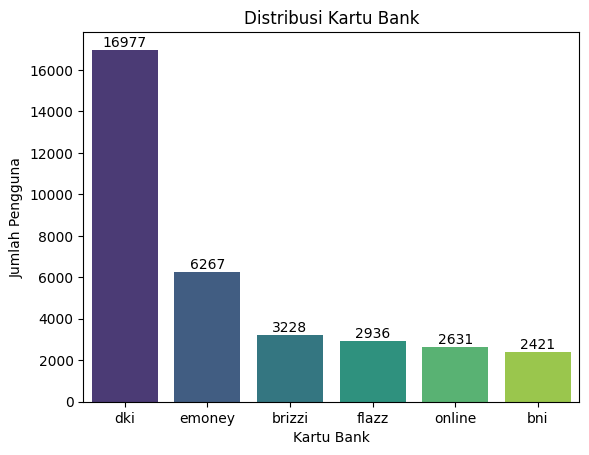

In [ ]:
# Data Visualization
plot = sns.barplot(data=jumlah_kartu, y='jumlah', x='payCardBank', palette='viridis')
plot.bar_label(plot.containers[0])
plt.title('Distribusi Kartu Bank')
plt.xlabel('Kartu Bank')
plt.ylabel('Jumlah Pengguna')
plt.show()

Dari hasil diatas dapat kita lihat ternyata yang paling banyak digunakan adalah kartu bank dki dengan jumlah 16.977 selama bulan April dilanjut dengan emoney,brizzi,flazz dan yang paling sedikit digunakan adalah kartu bank bni dengan jumlah 2421 untuk type pembayaran online kita tidak akan menganalisanya lebih lanjut karena untuk type pembayaran online tidak ada relevansinya dengan analisa kita

Setelah melakukan analisa terhapada jumlah pengguna untuk setiap kartu pada semua corridor yang ada pada Transjakarta kita akan lanjut menganalisa berapa jumlah gender Female dan Male pada setiap jenis kartu 

### **Jumlah Setiap perngguna kartu by `payCardSex`**

In [ ]:
# Jumlah pengguna untuk setiap kartu by Gender
kartu_by_gender = df.groupby(['payCardBank','payCardSex'])[['payCardBank']].count()
kartu_by_gender = kartu_by_gender.rename(columns={'payCardBank' : 'jumlah'}).reset_index().sort_values('jumlah',ascending=False)

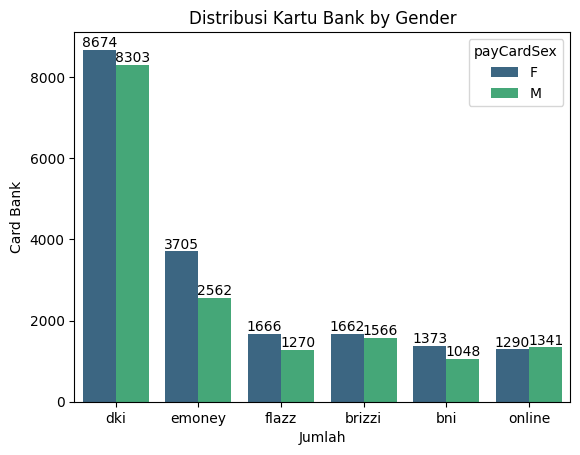

In [ ]:
# Data visualization
plot = sns.barplot(data=kartu_by_gender,x='payCardBank',y='jumlah',hue='payCardSex',palette='viridis')
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title('Distribusi Kartu Bank by Gender')
plt.xlabel('Jumlah')
plt.ylabel('Card Bank')
plt.show()

Dari hasil diatas dapat kita asumsikan ternyata mayoritas pengguna Transjakarta selama bulan April adalah gender Female dengan jumlah 18370 sedangkan untuk pengguna dengan Gender Male adalah 16090,dan pada setiap jenis kartu bank yang menggunakan terbanyak adalah gender female

Selanjutnya kita akan melihat jumlah setiap pengguna kartu berdasarkan range umur untuk semua corridor yang ada pada Transjakarta selama bulan April 

### **Jumlah Setiap perngguna kartu by `Age`**

In [206]:
# Membuat Age Group berdasarkan kartu yang digunakan
kartu_by_age = df.groupby(['payCardBank','Age Group'])[['payCardBank']].count().rename(columns={'payCardBank' : 'jumlah'}).reset_index().sort_values('jumlah',ascending=False)

<Axes: xlabel='Age Group', ylabel='jumlah'>

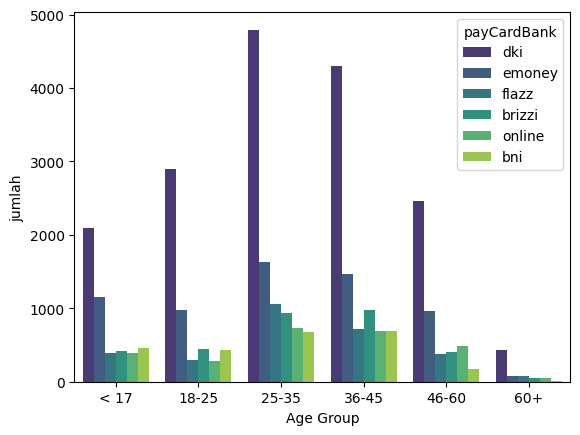

In [207]:
sns.barplot(data=kartu_by_age,x='Age Group',y='jumlah',hue='payCardBank',palette='viridis')

Dari hasil diatas dapat disimpulkan bahwa : 

* Kelompok usia < 17 menggunaakan kartu *dki* terbanyak dan yang paling sedikit adalah pengguna kartu brizzi
* Kelompok usia 18 - 25 menggunaakan kartu *dki* terbanyak dan yang paling sedikit adalah pengguna kartu flazz
* Kelompok usia 25 - 35 menggunaakan kartu *dki* terbanyak dan yang paling sedikit adalah pengguna kartu bni
* Kelompok usia 36 - 45 menggunaakan kartu *dki* terbanyak dan yang paling sedikit adalah pengguna kartu flaz,bni
* Kelompok usia 46 - 60 menggunaakan kartu *dki* terbanyak dan yang paling sedikit adalah pengguna kartu bni
* Kelompok usia 60 jumlah penggunaan kartu *dki* dan *bni* sama dan tidak ada yang menggunakan kartu *emoney* maupun *flazz*

Setelah kita menganalisa hal-hal diatas kita dapat menyimpulkan bahwa kartu yang terbanyak digunakan adalah kartu DKI dan Mayoritas pengguna Transjakarta dengan jenis kelamin Female dan untuk mayoritas Range umur adalah 18-60 yang dapat kita asumsikan bahwa pengguna adalah kalangan Pelajar dan Pekerja dan didukung oleh referensi dari internet https://www.medcom.id/ekonomi/bisnis/8koMoVlN-pengguna-gotransit-didominasi-pekerja-dan-pelajar, 

Kita akan menganalisa lebih lanjut Agar kita dapat dengan tepat merekomendasikan tempat pemasangan iklan berdasarkan bank yang digunakan pada setiap halte 

## **Pengguna bank DKI pada setiap `corridor` by `tapInDay`,`Age Group`,`payCardSex`**

Sebelum kita menganalisa hal lain kita perlu mencari tahu terlebih dahulu tentang corridor mana saja yang menggunakan kartu bank dki sebagai kartu bank yang terbanyak pengguna di corridor tersebut.

In [ ]:
# Mencari mayortitas yang menggunakan kartu dki terbanyak by corridorID
top_dki = df.groupby(['corridorID','payCardBank'])[['payCardBank']].count().rename(columns={'payCardBank' : 'jumlah'}).sort_values('jumlah',ascending=False).reset_index().head(10)
top_dki["peringkat"] = top_dki.groupby("corridorID")["jumlah"].transform(pd.Series.rank, ascending=False)
top_dki = top_dki[(top_dki['payCardBank'] == 'dki') & (top_dki["peringkat"] == 1)]

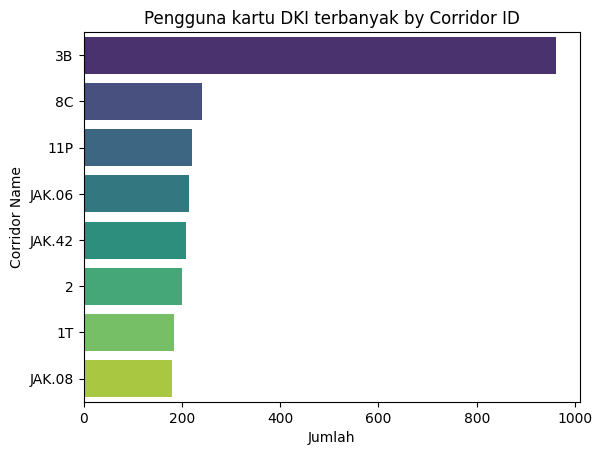

In [ ]:
# Data Visualization 
sns.barplot(data=top_dki,x='jumlah',y='corridorID',palette='viridis')
plt.title('Pengguna kartu DKI terbanyak by Corridor ID')
plt.xlabel('Jumlah')
plt.ylabel('Corridor Name')
plt.show()

Ternyata untuk corridor dengan id `3B`,`8C`,`11P`,`JAK.06`,`JAK.42`,`2`,`1T`,`JAK.08` adalah corridor dengan mayoritas pengguna kartu dki terbanyak,Setelah kita mendapatkan corridor coridor dengan mayoritas pengguna kartu bank dki kita dapat melakukan analisa melanjut untuk setiap corridornya.

#### **Mayoritas penggunaan kartu bank dki pada setiap corridor by `Gender`**

Setelah kita menganalisa pada corridor mana saja yang mayoritasnya adalah pengguna dari kartu DKI,kita akan menganalisa lebih lanjut berdasarkan berapa saja jumlah gender Female dan Male yang menggunakan kartu DKI di corridor tersebut agar dapat memberikan dapat memberikan rekomendasi type iklan sesuai dengan mayoritas gender

In [ ]:
# Membuat Dataframe baru yang berisi tentang seberapa banyak gender F atau M pada corridor diatas
dki_by_gender = pd.merge(top_dki, df, on=['corridorID', 'payCardBank'])
dki_by_gender = dki_by_gender.groupby(['corridorID','payCardBank','payCardSex'])[['payCardSex']].count().rename(columns={'payCardSex' : 'count'}).reset_index().sort_values('count',ascending=False)

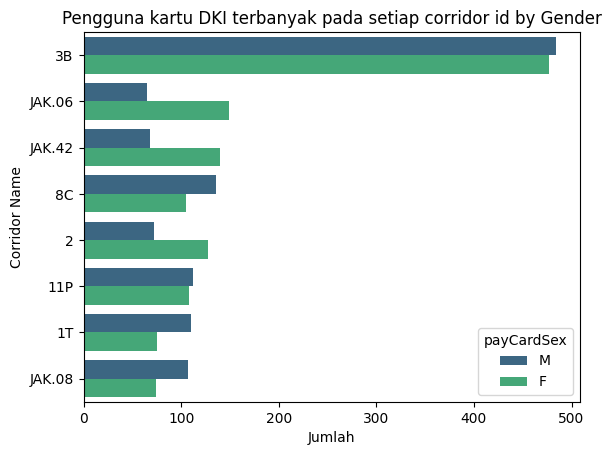

In [ ]:
# Data Visualization
sns.barplot(data=dki_by_gender,x='count',y='corridorID',hue='payCardSex',palette='viridis')
plt.title('Pengguna kartu DKI terbanyak pada setiap corridor id by Gender')
plt.xlabel('Jumlah')
plt.ylabel('Corridor Name')
plt.show()

Untuk corridor 3B,8C,11P,1T dan JAK.08 adalah corridor dengan Mayoritas pengguna dengan gender Male,sedangkan untuk sisanya memiliki Mayoritas pengguna dengan gender Female dan untuk corridor 3B jumlah Female dan Male tidak berbeda signifikan.

#### **Mayoritas penggunaan kartu bank dki pada setiap corridor by `Age Group`**

In [ ]:
# Membuat kolom Age Group
bins = [0, 17, 25, 35, 45, 60, float('inf')]
labels = ['< 17', '18-25', '25-35', '36-45', '46-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
# List corridor pada corridor yang mayoritasnya menggunakan bank dki
top_dki_corridor = ['3B', '8C', '11P', 'JAK.06', 'JAK.42', '2', '1T', 'JAK.08']

In [ ]:
# Mengelompokan berdasarkan gender
selected_df_dki = df[(df['corridorID'].isin(top_dki_corridor)) & (df['payCardBank'] == 'dki')]
kartu_dki_by_age = selected_df_dki.groupby(['corridorID', 'Age Group'])[['Age']].count().reset_index()
kartu_dki_by_age = kartu_dki_by_age.rename(columns={'Age': 'jumlah'})

Text(0.5, 1.0, 'Penggunaan kartu DKI pada setiap corridor by Age Group')

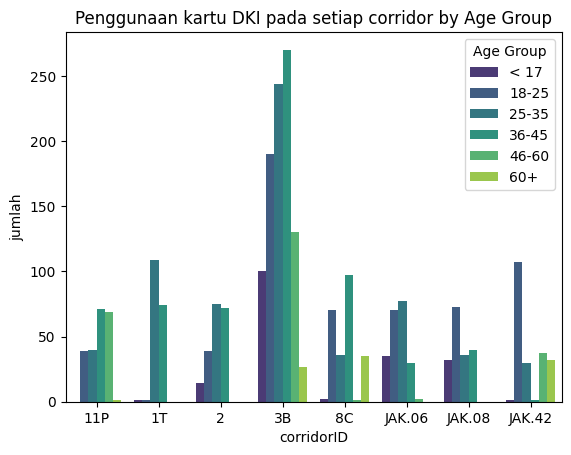

In [ ]:
# Data Visualization
sns.barplot(data=kartu_dki_by_age,x='corridorID',y='jumlah',hue='Age Group',palette="viridis")
plt.title('Penggunaan kartu DKI pada setiap corridor by Age Group')

Dilihat dari grafik diatas, dapat dilihat bahwa pengguna kartu DKI terbanyak ada pada koridor 3B dengan proporsi rentan usia terbanyak dibandingkan dengan koridor lainnnya, dengan kelompok usia 36-45 tahun. Ini membuktikan bahwa banyak pengguna kartu DKI yang bisa dijadikan segment market yang sesuai dengan promosi dari bank DKI. Slenjutnya mari kita lihat jam padat di halte tersebut

#### **Aktivitas pada setiap corridor by `tapInDay`**

In [ ]:
day_prod_dki = df[(df['corridorID'].isin(top_dki_corridor))].groupby(['corridorID','tapInDay'])[['payCardBank']].count().reset_index().rename(columns={'payCardBank' : 'jumlah'})

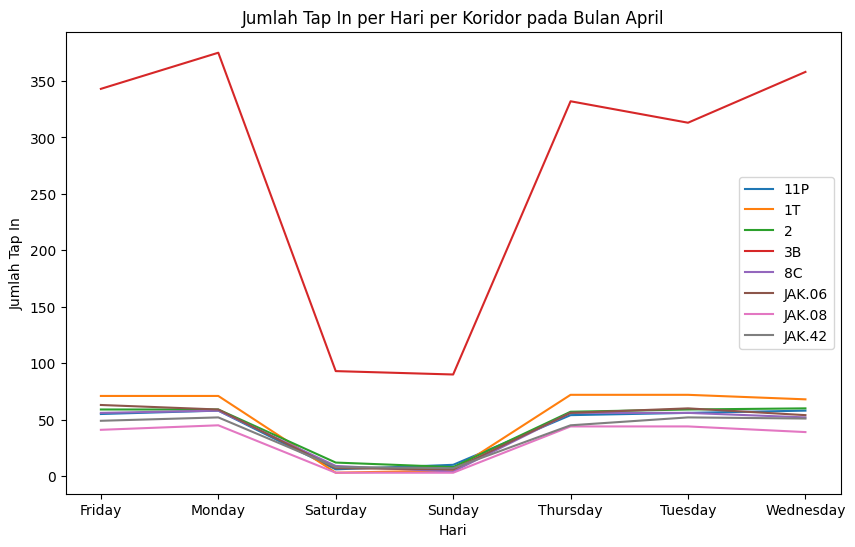

In [ ]:
# Data Visualization
plt.figure(figsize=(10,6))
corridor_ids = day_prod_dki['corridorID'].unique()
for corridor_id in corridor_ids:
    sns.lineplot(data=day_prod_dki[day_prod_dki['corridorID'] == corridor_id],
                 x='tapInDay',
                 y='jumlah',
                 ci=0,
                 label=corridor_id)
plt.title('Jumlah Tap In per Hari per Koridor pada Bulan April')
plt.xlabel('Hari')
plt.ylabel('Jumlah Tap In')
plt.legend()
plt.show()

dilihat dari grafik diatas untuk setiap halte paling sibuk berada pada hari kerja (senin-Jumat) dan menurun pada hari sabtu dan minggu. yang artinya traffic di setiap halte sangat padat setiap harinya. Selanjutnya, mari kita lihat distribusi penggunaan kartu emoney berdasarkan pengguna terbanyak dari setiap halte.

## **Pengguna emoney pada setiap `corridor` by `tapInDay`,`Age Group`,`payCardSex`**

Sebelum kita menganalisa hal lain kita perlu mencari tahu terlebih dahulu tentang corridor mana saja yang menggunakan kartu bank emoney sebagai kartu bank yang terbanyak pengguna di corridor tersebut.

In [ ]:
# Mencari mayortitas yang menggunakan kartu emoney terbanyak by corridorID
top_emoney = df.groupby(['corridorID','payCardBank','corridorName'])[['payCardBank']].count().rename(columns={'payCardBank' : 'jumlah'}).sort_values('jumlah',ascending=False).reset_index()
top_emoney["peringkat"] = top_emoney.groupby("corridorID")["jumlah"].transform(pd.Series.rank, ascending=False)
top_emoney = top_emoney[(top_emoney["payCardBank"] == "emoney") & (top_emoney["peringkat"] == 1)].head(10)

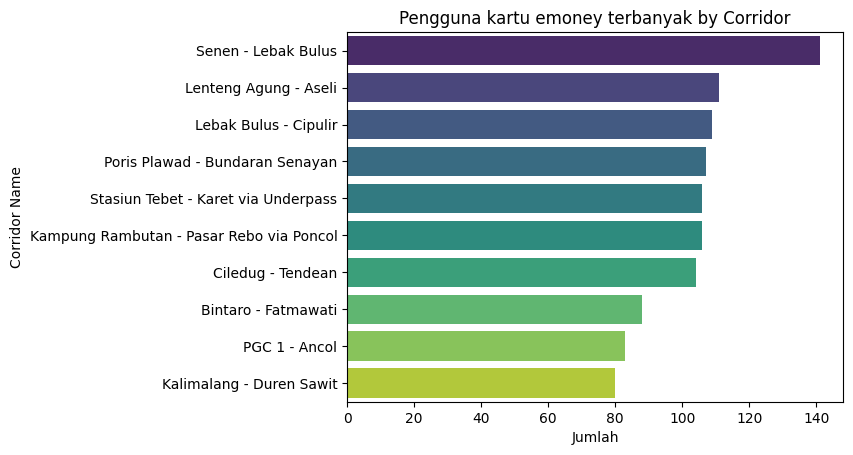

In [ ]:
# Data Visualization 
sns.barplot(data=top_emoney,x='jumlah',y='corridorName',palette='viridis')
plt.title('Pengguna kartu emoney terbanyak by Corridor')
plt.xlabel('Jumlah')
plt.ylabel('Corridor Name')
plt.show()

dari grafik diatas bisa kita lihat bahwa terdapat 10 halte dengan pengguna kartu emonen terbanyak. Ini bisa menjadi dasar untuk pengambilan tempat promosi untuk perusahaan emoney. Pengguna terbanyak kartu emoney ada pada halte jurusan Senen-Lebakbulus dan yang paling sedikit ada pada halte jurusan Kalimalang - Duren Sawit. Selanjutnya mari kita lihat demografi pengguna di setiap halte.

#### **Mayoritas penggunaan kartu bank emoney pada setiap corridor by `Gender`**

Setelah kita menganalisa pada corridor mana saja yang mayoritasnya adalah pengguna dari kartu emoney,kita akan menganalisa lebih lanjut berdasarkan berapa saja jumlah gender Female dan Male yang menggunakan kartu emoney di corridor tersebut agar dapat memberikan dapat memberikan rekomendasi type iklan sesuai dengan mayoritas gender

In [ ]:
emoney_by_gender = pd.merge(top_emoney, df, on=['corridorID', 'payCardBank','corridorName'])
emoney_by_gender = emoney_by_gender.groupby(['corridorID','payCardBank','payCardSex','corridorName'])[['payCardSex']].count().rename(columns={'payCardSex' : 'count'}).reset_index().sort_values('count',ascending=False)

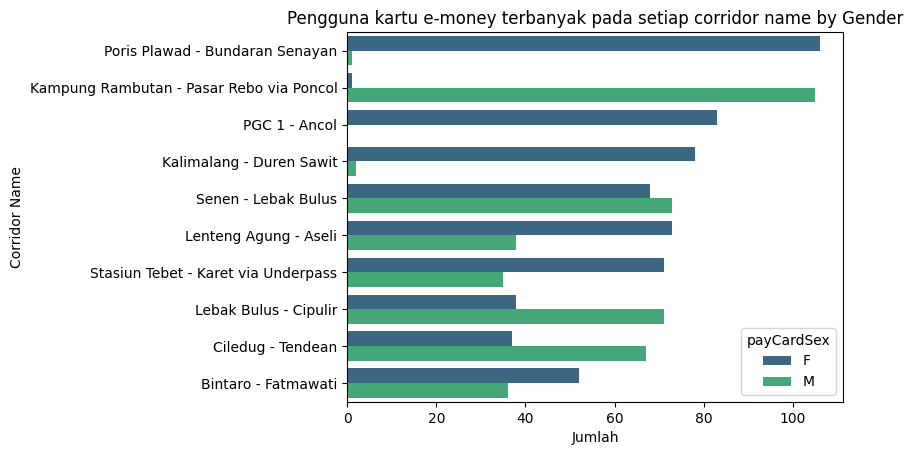

In [ ]:
# Data Visualization
sns.barplot(data=emoney_by_gender,x='count',y='corridorName',hue='payCardSex',palette='viridis')
plt.title('Pengguna kartu e-money terbanyak pada setiap corridor name by Gender')
plt.xlabel('Jumlah')
plt.ylabel('Corridor Name')
plt.show()

Dari grafik diatas dapat disimpulkan bahwa :

- Pengunna kartu emoney paling banyak pada  Halte jurusan Poris Plawad - Bundaran Senayan adalah wanita.
- Pengguna kartu emoney paling banyak di halte jurusan Kampung Rampbutan - Pasar Rebo via Poncol adalah laki-laki
- Pengguna kartu emoney paling banyak di halte jurusan PGC 1 -Ancol adalah Perempuan
- Pengguna kartu emoney paling banyak di halte jurusan Kalimalang -Duren Sawit adalah perempuan
- Pengguna kartu emoney paling banyak di halte jurusan Senen - Lebak bulus adalah laki-laki
- Pengguna kartu emoney paling banyak di halte jurusan Lenteng Agung - Aseli adalah Perempuan
- Pengguna kartu emoney paling banyak di halte jurusan Stasiun Tebet - Karet via Underpass adalah perempuan
- Pengguna kartu emoney paling banyak di halte jurusan Lebak Bulus - Cipulir adalah laki-laki
- Pengguna kartu emoney paling banyak di halte jurusan Ciledug Tendean adalah Laki-laki
- Pengguna kartu emoney paling banyak di halte jurusan Bintaro - Fatmawati adalah Perempuan

dapat disimpulkan bahwa sebagian besar pengguna di setiap halte adalah perempuan. ini bisa menjadikan segmen passar berdasarkan jenis kelamin terbanyak untuk pengguna emoney adalah perempuan. Selanjutnya mari kita lihat persebaran emoney berdasarkan usia. 

#### **Mayoritas penggunaan kartu bank emoney pada setiap corridor by `Age Group`**

In [ ]:
top_emoney_corridor = ['6H', 'JAK.64', 'JAK.49', 'T11', '6D', 'JAK.72', '13', 'S31', '5D','JAK.39']

In [ ]:
selected_df = df[(df['corridorID'].isin(top_emoney_corridor)) & (df['payCardBank'] == 'dki')]
kartu_emoney_by_age = selected_df.groupby(['corridorID', 'Age Group'])[['Age']].count().reset_index()
kartu_emoney_by_age = kartu_emoney_by_age.rename(columns={'Age': 'jumlah'})

Text(0.5, 1.0, 'Penggunaan kartu emoney pada setiap corridor by Age Group')

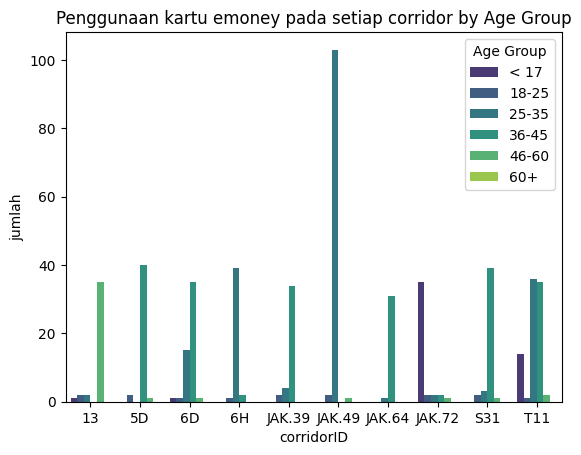

In [ ]:
sns.barplot(data=kartu_emoney_by_age,x='corridorID',y='jumlah',hue='Age Group',palette="viridis")
plt.title('Penggunaan kartu emoney pada setiap corridor by Age Group')

dari grafik di atas dapat kita simpulkan bahwa :

- Pengguna kartu emoney paling banyak pada coridor 13 adalah pengguna dengan kelompok usia 60 tahun keatas
- Pengguna kartu emoney paling banyak pada koridor 5D adalah pengguna dengan kelompok usia 46-60 tahun
- Pengguna kartu emoney paling banyak pada koridor 6D adalah pengguna dengan kelompok usia 36-45 tahun
- Pengguna kartu emoney paling banyak pada koridor 6H adalah pengguna dengan kelompok usia 25-35 tahun
- Pengguna kartu emoney paling banyak pada koridor JAK.39 adalah pengguna dengan kelompok usia 36-45 tahun
- Pengguna kartu emoney paling banyak pada koridor JAK.49 adalah pengguna dengan kelompok usia 25-35 tahun
- Pengguna kartu emoney paling banyak pada koridor JAK.64 adalah pengguna dengan kelompok usia 36-45 tahun
- Pengguna kartu emoney paling banyak pada koridor JAK.72 adalah pengguna dengan kelompok usia <17 tahun
- Pengguna kartu emoney paling banyak pada koridor S31 adalah pengguna dengan kelompok usia 36-45 tahun
- Pengguna kartu emoney paling banyak pada koridor T11 adalah pengguna dengan kelompok usia 25-35 tahun

Persebaran pengguna kartu berdasarkan kelompok usia bervariasi, pengguna emoney terbanyak ada pada koridor JAK 49 dengan rentan usia 25-35 tahun. Selanjutnya mari kita lihar persebaran pengguna kartu emoney di setiap halte berdasarkan waktu produktifnya.

#### **Aktivitas pada setiap corridor by `tapInDay`**

In [ ]:
jam_prod_emoney = df[(df['corridorID'].isin(top_emoney_corridor))].groupby(['corridorID','tapInDay'])[['payCardBank']].count().reset_index().rename(columns={'payCardBank' : 'jumlah'})

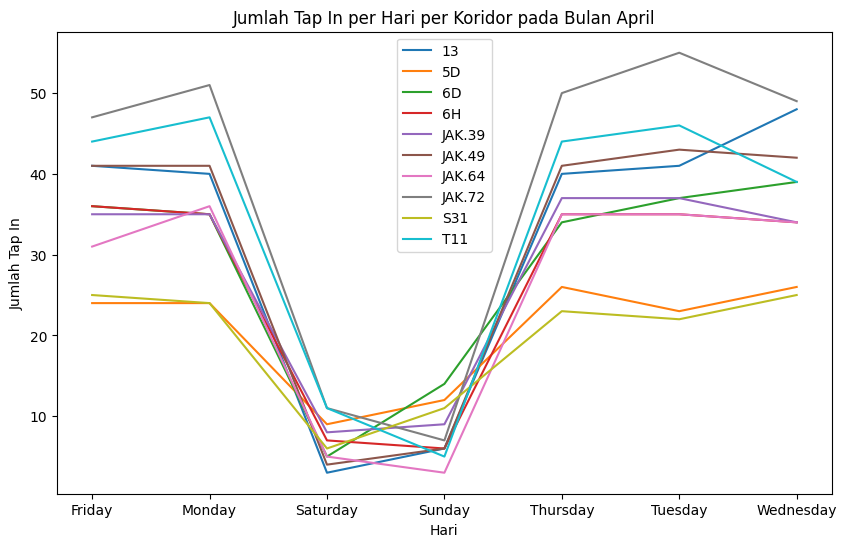

In [ ]:
plt.figure(figsize=(10,6))
corridor_emoney = jam_prod_emoney['corridorID'].unique()
for corridor_id in corridor_emoney:
    sns.lineplot(data=jam_prod_emoney[jam_prod_emoney['corridorID'] == corridor_id],
                 x='tapInDay',
                 y='jumlah',
                 ci=0,
                 label=corridor_id)
plt.title('Jumlah Tap In per Hari per Koridor pada Bulan April')
plt.xlabel('Hari')
plt.ylabel('Jumlah Tap In')
plt.legend()
plt.show()

Dari grafik diatas dapat dilihat bahwa untuk setiap koridor memiliki jam produktif yang tidak terlalu jauh, dimana selama weekday (senin-jumat) traffic penumpang terlihat padat dan menurun pada saat weekend(sabtu-minggu).

## **Pengguna Flazz pada setiap `corridor` by `tapInDay`,`Age Group`,`payCardSex`**

Sebelum kita menganalisa hal lain kita perlu mencari tahu terlebih dahulu tentang corridor mana saja yang menggunakan kartu bank flazz sebagai kartu bank yang terbanyak pengguna di corridor tersebut.

In [ ]:
# Mencari mayortitas yang menggunakan kartu flazz terbanyak by corridorID
top_flazz = df.groupby(['corridorID','payCardBank','corridorName'])[['payCardBank']].count().rename(columns={'payCardBank' : 'jumlah'}).sort_values('jumlah',ascending=False).reset_index()
top_flazz["peringkat"] = top_flazz.groupby("corridorID")["jumlah"].transform(pd.Series.rank, ascending=False)
top_flazz = top_flazz[(top_flazz["payCardBank"] == "flazz") & (top_flazz["peringkat"] == 1)]

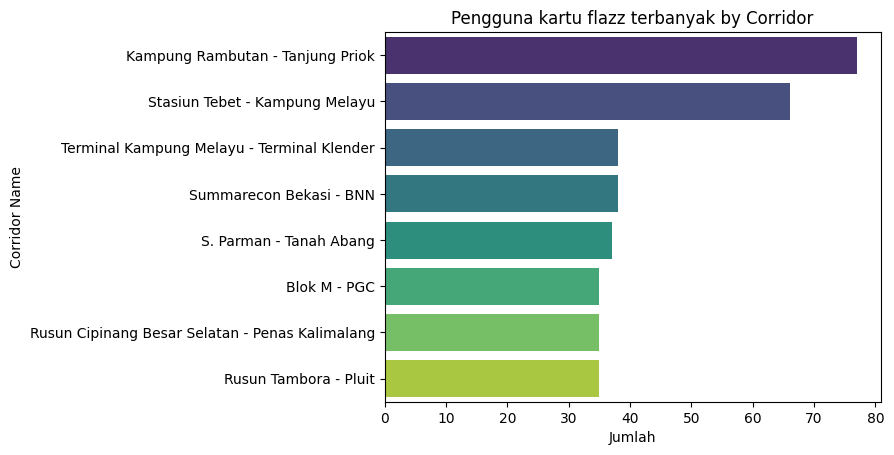

In [ ]:
# Data Visualization
sns.barplot(data=top_flazz,x='jumlah',y='corridorName',palette='viridis')
plt.title('Pengguna kartu flazz terbanyak by Corridor')
plt.xlabel('Jumlah')
plt.ylabel('Corridor Name')
plt.show()

dari grafik diatas bisa kita lihat bahwa terdapat 10 halte dengan pengguna kartu flazz terbanyak. Ini bisa menjadi dasar untuk pengambilan tempat promosi untuk perusahaan flazz. Pengguna terbanyak kartu flazz ada pada halte jurusan Kampung Rambutan - Tanjung Priuk dan yang paling sedikit ada pada halte jurusan Rusun Tambora - Pluit. Selanjutnya mari kita lihat demografi pengguna di setiap halte.

#### **Mayoritas penggunaan kartu bank flazz pada setiap corridor by `payCardSex`**

Setelah kita menganalisa pada corridor mana saja yang mayoritasnya adalah pengguna dari kartu flazz,kita akan menganalisa lebih lanjut berdasarkan berapa saja jumlah gender Female dan Male yang menggunakan kartu flazz di corridor tersebut agar dapat memberikan dapat memberikan rekomendasi type iklan sesuai dengan mayoritas gender

In [ ]:
flazz_by_gender = pd.merge(top_flazz, df, on=['corridorID', 'payCardBank'])
flazz_by_gender = flazz_by_gender.groupby(['corridorID','payCardBank','corridorName_y','payCardSex'])[['payCardSex']].count().rename(columns={'payCardSex' : 'count'}).reset_index().sort_values('count',ascending=False).rename(columns={'corridorName_y' : 'corridorName'})

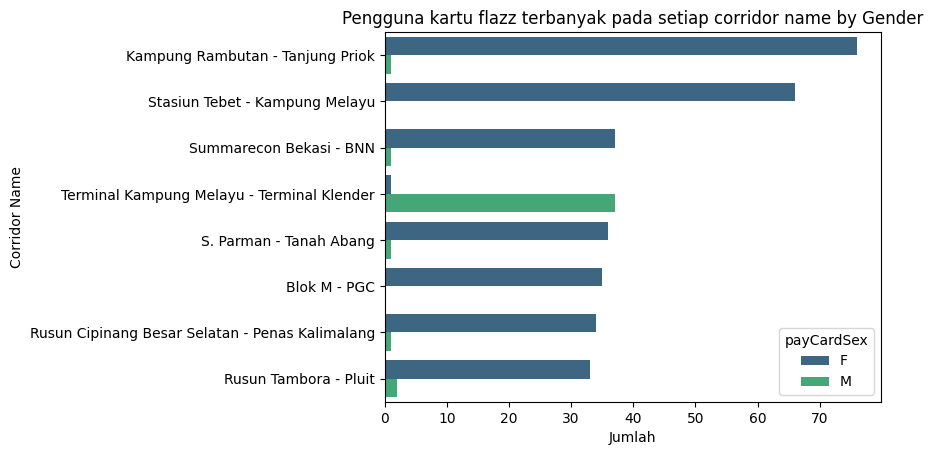

In [ ]:
# Data Visualization
sns.barplot(data=flazz_by_gender,x='count',y='corridorName',hue='payCardSex',palette='viridis')
plt.title('Pengguna kartu flazz terbanyak pada setiap corridor name by Gender')
plt.xlabel('Jumlah')
plt.ylabel('Corridor Name')
plt.show()

Dari grafik diatas dapat disimpulkan bahwa :

- Pengunna kartu emoney paling banyak pada  Halte jurusan Poris Plawad - Bundaran Senayan adalah wanita.
- Pengguna kartu emoney paling banyak di halte jurusan Kampung Rampbutan - Pasar Rebo via Poncol adalah laki-laki
- Pengguna kartu emoney paling banyak di halte jurusan PGC 1 -Ancol adalah Perempuan
- Pengguna kartu emoney paling banyak di halte jurusan Kalimalang -Duren Sawit adalah perempuan
- Pengguna kartu emoney paling banyak di halte jurusan Senen - Lebak bulus adalah laki-laki
- Pengguna kartu emoney paling banyak di halte jurusan Lenteng Agung - Aseli adalah Perempuan
- Pengguna kartu emoney paling banyak di halte jurusan Stasiun Tebet - Karet via Underpass adalah perempuan
- Pengguna kartu emoney paling banyak di halte jurusan Lebak Bulus - Cipulir adalah laki-laki
- Pengguna kartu emoney paling banyak di halte jurusan Ciledug Tendean adalah Laki-laki
- Pengguna kartu emoney paling banyak di halte jurusan Bintaro - Fatmawati adalah Perempuan

dapat disimpulkan bahwa sebagian besar pengguna di setiap halte adalah perempuan. ini bisa menjadikan segmen passar berdasarkan jenis kelamin terbanyak untuk pengguna emoney adalah perempuan. Selanjutnya mari kita lihat persebaran emoney berdasarkan usia. 

#### **Mayoritas penggunaan kartu bank flazz pada setiap corridor by `Age Group`**

In [ ]:
top_flazz_corridor = ['10D', 'JAK.48B', 'JAK.106', 'B11', '8M', '7Q', '10B', '9F']

In [ ]:
selected_df = df[(df['corridorID'].isin(top_flazz_corridor)) & (df['payCardBank'] == 'dki')]
kartu_flazz_by_age = selected_df.groupby(['corridorID', 'Age Group'])[['Age']].count().reset_index()
kartu_flazz_by_age = kartu_flazz_by_age.rename(columns={'Age': 'jumlah'})

Text(0.5, 1.0, 'Penggunaan kartu flazz pada setiap corridor by Age Group')

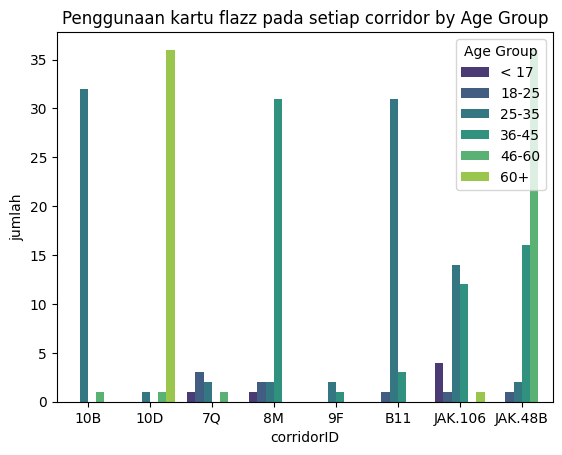

In [ ]:
sns.barplot(data=kartu_flazz_by_age,x='corridorID',y='jumlah',hue='Age Group',palette="viridis")
plt.title('Penggunaan kartu flazz pada setiap corridor by Age Group')

dari grafik di atas dapat kita simpulkan bahwa :

- Pengguna kartu emoney paling banyak pada coridor 10B adalah pengguna dengan kelompok usia 18-25 tahun
- Pengguna kartu emoney paling banyak pada koridor 10D adalah pengguna dengan kelompok usia 60 tahun keatas
- Pengguna kartu emoney paling banyak pada koridor 7Q adalah pengguna dengan kelompok usia 18-25 tahun
- Pengguna kartu emoney paling banyak pada koridor 8M adalah pengguna dengan kelompok usia 36-45 tahun
- Pengguna kartu emoney paling banyak pada koridor 9F adalah pengguna dengan kelompok usia 25-35 tahun
- Pengguna kartu emoney paling banyak pada koridor B11 adalah pengguna dengan kelompok usia 25-35 tahun
- Pengguna kartu emoney paling banyak pada koridor JAK.106 adalah pengguna dengan kelompok usia 25-35 tahun
- Pengguna kartu emoney paling banyak pada koridor JAK.48B adalah pengguna dengan kelompok usia 60 tahun keatas

Persebaran pengguna kartu berdasarkan kelompok usia bervariasi, pengguna emoney terbanyak ada pada koridor 10D dengan rentan usia 60 tahun keatas. Selanjutnya mari kita lihat persebaran pengguna kartu emoney di setiap halte berdasarkan waktu produktifnya.

#### **Aktivitas pada setiap corridor by `tapInDay`**

In [ ]:
jam_prod_flazz = df[(df['corridorID'].isin(top_flazz_corridor))].groupby(['corridorID','tapInDay'])[['payCardBank']].count().reset_index().rename(columns={'payCardBank' : 'jumlah'})

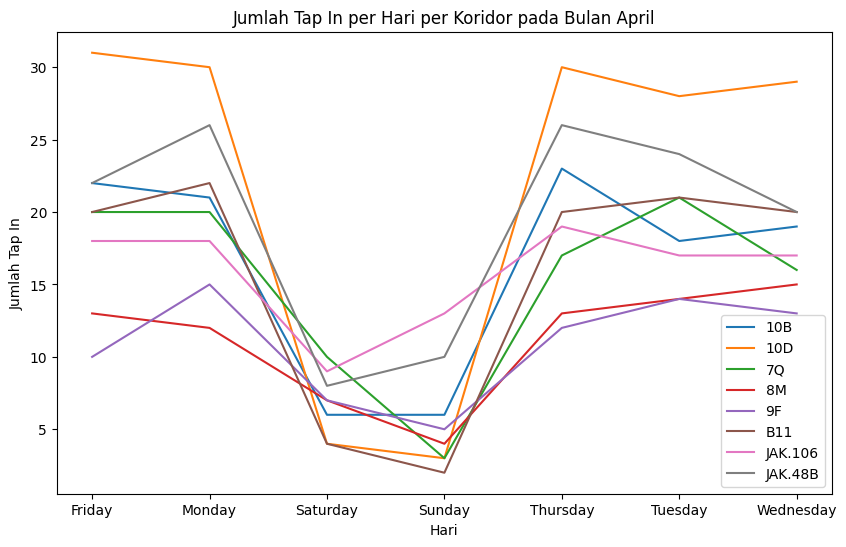

In [ ]:
plt.figure(figsize=(10,6))
corridor_flazz = jam_prod_flazz['corridorID'].unique()
for corridor_id in corridor_flazz:
    sns.lineplot(data=jam_prod_flazz[jam_prod_flazz['corridorID'] == corridor_id],
                 x='tapInDay',
                 y='jumlah',
                 ci=0,
                 label=corridor_id)
plt.title('Jumlah Tap In per Hari per Koridor pada Bulan April')
plt.xlabel('Hari')
plt.ylabel('Jumlah Tap In')
plt.legend()
plt.show()

Dari grafik diatas dapat dilihat bahwa untuk setiap koridor memiliki jam produktif yang tidak terlalu jauh, dimana selama weekday (senin-jumat) traffic penumpang terlihat padat dan menurun pada saat weekend(sabtu-minggu).

## **Pengguna Brizzi  untuk setiap `corridor` by `tapInDay`,`Age Group`,`payCardSex`**

Sebelum kita menganalisa hal lain kita perlu mencari tahu terlebih dahulu tentang corridor mana saja yang menggunakan kartu bank brizzi sebagai kartu bank yang terbanyak pengguna di corridor tersebut.

In [ ]:
top_brizzi = df.groupby(['corridorID','payCardBank','corridorName'])[['payCardBank']].count().rename(columns={'payCardBank' : 'jumlah'}).sort_values('jumlah',ascending=False).reset_index()
top_brizzi["peringkat"] = top_brizzi.groupby("corridorID")["jumlah"].transform(pd.Series.rank, ascending=False)
top_brizzi = top_brizzi[(top_brizzi["payCardBank"] == "brizzi") & (top_brizzi["peringkat"] == 1)]

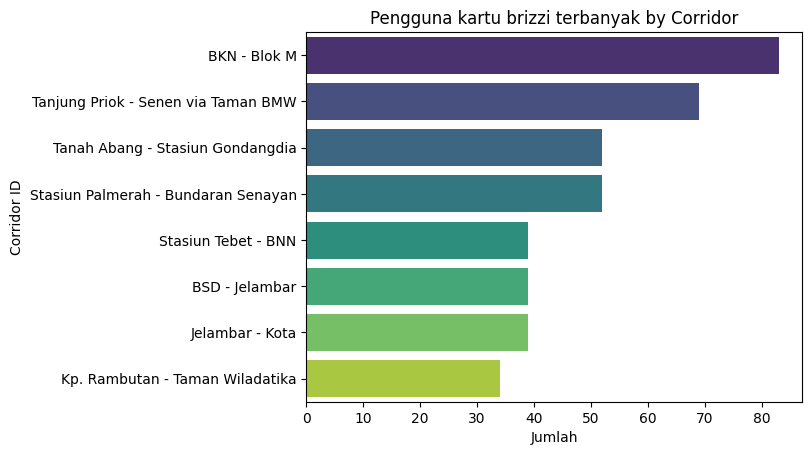

In [ ]:
sns.barplot(data=top_brizzi,x='jumlah',y='corridorName',palette='viridis')
plt.title('Pengguna kartu brizzi terbanyak by Corridor')
plt.xlabel('Jumlah')
plt.ylabel('Corridor ID')
plt.show()

dari grafik diatas bisa kita lihat bahwa terdapat 10 halte dengan pengguna kartu brizzi terbanyak. Ini bisa menjadi dasar untuk pengambilan tempat promosi untuk perusahaan brizzi. Pengguna terbanyak kartu brizzi ada pada halte jurusan BKN - Blok-M dan yang paling sedikit ada pada halte jurusan Kampung Rambutan - Taman Wiladatika. Selanjutnya mari kita lihat demografi pengguna di setiap halte.

#### **Mayoritas penggunaan kartu bank brizzi pada setiap corridor by `payCardSex`**

Setelah kita menganalisa pada corridor mana saja yang mayoritasnya adalah pengguna dari kartu brizzi,kita akan menganalisa lebih lanjut berdasarkan berapa saja jumlah gender Female dan Male yang menggunakan kartu brizzi di corridor tersebut agar dapat memberikan dapat memberikan rekomendasi type iklan sesuai dengan mayoritas gender

In [ ]:
brizzi_by_gender = pd.merge(top_brizzi, df, on=['corridorID', 'payCardBank'])
brizzi_by_gender = brizzi_by_gender.groupby(['corridorID','payCardBank','corridorName_y','payCardSex'])[['payCardSex']].count().rename(columns={'payCardSex' : 'count'}).reset_index().sort_values('count',ascending=False).rename(columns={'corridorName_y' : 'corridorName'})

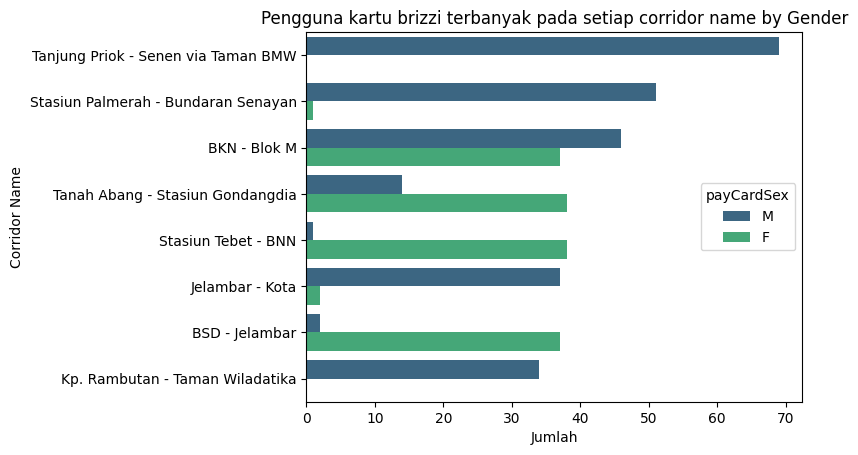

In [ ]:
# Data Visualization
sns.barplot(data=brizzi_by_gender,x='count',y='corridorName',hue='payCardSex',palette='viridis')
plt.title('Pengguna kartu brizzi terbanyak pada setiap corridor name by Gender')
plt.xlabel('Jumlah')
plt.ylabel('Corridor Name')
plt.show()

Dari grafik diatas dapat disimpulkan bahwa :

- Pengunna kartu brizzi paling banyak pada  Halte Tanjung Priok - Senen via Taman BMW adalah laki-laki.
- Pengguna kartu brizzi paling banyak di halte jurusan Stasiun Palmerah - bundaran Senayan adalah laki-laki
- Pengguna kartu brizzi paling banyak di halte jurusan BKN - Blok M adalah Laki-laki
- Pengguna kartu brizzi paling banyak di halte jurusan Tanah Abang - Stasiun Gonangdia adalah perempuan
- Pengguna kartu brizzi paling banyak di halte jurusan Stasiun Tebet - BNN adalah perempuan
- Pengguna kartu brizzi paling banyak di halte jurusan Jelambar - Kota adalah Laki-laki
- Pengguna kartu brizzi paling banyak di halte jurusan BSD - Jelambar adalah perempuan
- Pengguna kartu brizzi paling banyak di halte jurusan Kp. rambutan - Taman Wiladatika adalah laki-laki
- Pengguna kartu brizzi paling banyak di halte jurusan Ciledug Tendean adalah Laki-laki
- Pengguna kartu brizzi paling banyak di halte jurusan Bintaro - Fatmawati adalah Perempuan

dapat disimpulkan bahwa sebagian besar pengguna di setiap halte adalah perempuan. ini bisa menjadikan segmen passar berdasarkan jenis kelamin terbanyak untuk pengguna emoney adalah perempuan. Selanjutnya mari kita lihat persebaran emoney berdasarkan usia. 

#### **Mayoritas penggunaan kartu bank brizzi pada setiap corridor by `Age Group`**

In [ ]:
top_brizzi_corridor = ['M7B', '10K', '1H', '1F', '5B', 'S11', '3H', 'JAK.28']

In [ ]:
selected_df = df[(df['corridorID'].isin(top_brizzi_corridor)) & (df['payCardBank'] == 'dki')]
kartu_brizzi_by_age = selected_df.groupby(['corridorID', 'Age Group'])[['Age']].count().reset_index()
kartu_brizzi_by_age = kartu_brizzi_by_age.rename(columns={'Age': 'jumlah'})

Text(0.5, 1.0, 'Penggunaan kartu brizzi pada setiap corridor by Age Group')

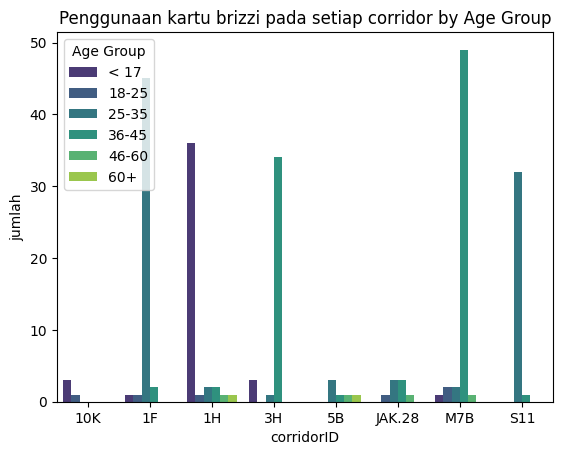

In [ ]:
sns.barplot(data=kartu_brizzi_by_age,x='corridorID',y='jumlah',hue='Age Group',palette="viridis")
plt.title('Penggunaan kartu brizzi pada setiap corridor by Age Group')

dari grafik di atas dapat kita simpulkan bahwa :

- Pengguna kartu brizzi paling banyak pada koridor 10K adalah pengguna dengan kelompok usia <17 tahun
- Pengguna kartu brizzi paling banyak pada koridor 1F adalah pengguna dengan kelompok usia 25-35 tahun
- Pengguna kartu brizzi paling banyak pada koridor 1H adalah pengguna dengan kelompok usia <17 tahun
- Pengguna kartu brizzi paling banyak pada koridor 3H adalah pengguna dengan kelompok usia 36-45 tahun
- Pengguna kartu brizzi paling banyak pada koridor 5B adalah pengguna dengan kelompok usia 25-35 tahun
- Pengguna kartu brizzi paling banyak pada koridor JAK.28 adalah pengguna dengan kelompok usia 25-35 tahun
- Pengguna kartu brizzi paling banyak pada koridor M7B adalah pengguna dengan kelompok usia 36-45 tahun
- Pengguna kartu brizzi paling banyak pada koridor SI1 adalah pengguna dengan kelompok usia 25-35 tahun keatas

Persebaran pengguna kartu berdasarkan kelompok usia bervariasi, pengguna emoney terbanyak ada pada koridor 10D dengan rentan usia 60 tahun keatas. Selanjutnya mari kita lihar persebaran pengguna kartu emoney di setiap halte berdasarkan waktu produktifnya.

#### **Aktivitas pada setiap corridor by `tapInDay`**

In [ ]:
jam_prod_brizzi = df[(df['corridorID'].isin(top_brizzi_corridor))].groupby(['corridorID','tapInDay'])[['payCardBank']].count().reset_index().rename(columns={'payCardBank' : 'jumlah'})

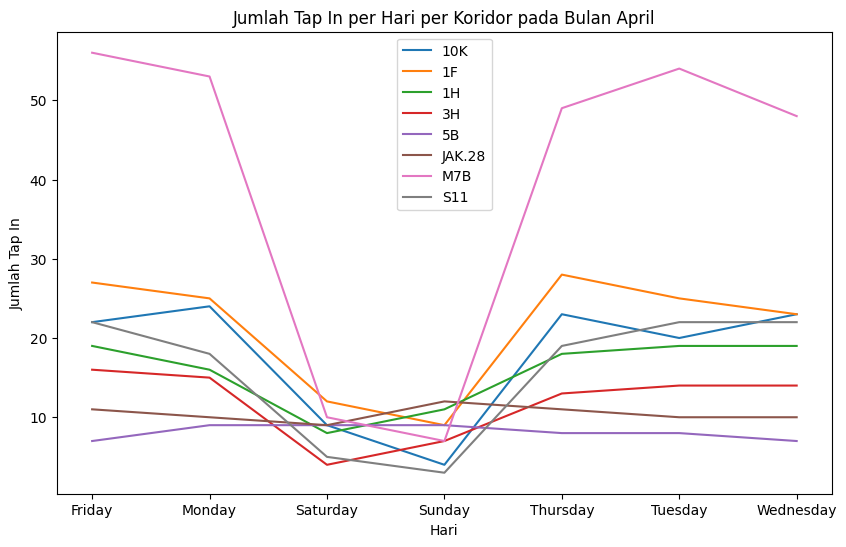

In [ ]:
plt.figure(figsize=(10,6))
corridor_brizzi = jam_prod_brizzi['corridorID'].unique()
for corridor_id in corridor_brizzi:
    sns.lineplot(data=jam_prod_brizzi[jam_prod_brizzi['corridorID'] == corridor_id],
                 x='tapInDay',
                 y='jumlah',
                 ci=0,
                 label=corridor_id)
plt.title('Jumlah Tap In per Hari per Koridor pada Bulan April')
plt.xlabel('Hari')
plt.ylabel('Jumlah Tap In')
plt.legend()
plt.show()

Dari grafik diatas dapat dilihat bahwa untuk setiap koridor memiliki jam produktif yang tidak terlalu jauh, dimana selama weekday (senin-jumat) traffic penumpang terlihat padat dan menurun pada saat weekend(sabtu-minggu).

## **Pengguna bank BNI untuk setiap `corridor` by `tapInDay`,`Age Group`,`payCardSex`**

Sebelum kita menganalisa hal lain kita perlu mencari tahu terlebih dahulu tentang corridor mana saja yang menggunakan kartu bank bni sebagai kartu bank yang terbanyak pengguna di corridor tersebut.

In [ ]:
top_bni = df.groupby(['corridorID','payCardBank','corridorName'])[['payCardBank']].count().rename(columns={'payCardBank' : 'jumlah'}).sort_values('jumlah',ascending=False).reset_index()
top_bni["peringkat"] = top_bni.groupby("corridorID")["jumlah"].transform(pd.Series.rank, ascending=False)
top_bni = top_bni[(top_bni["payCardBank"] == "bni") & (top_bni["peringkat"] == 1)]

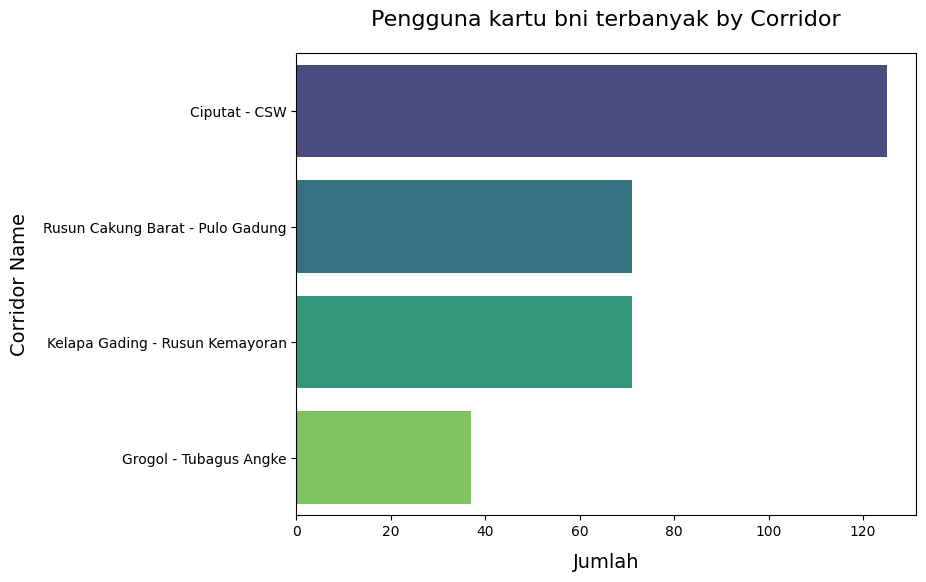

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_bni,x='jumlah',y='corridorName',palette='viridis')
plt.title('Pengguna kartu bni terbanyak by Corridor', size=16, pad=20)
plt.xlabel('Jumlah', size =14, labelpad = 10)
plt.ylabel('Corridor Name', size =14, labelpad = 10)
plt.show()

dari grafik diatas bisa kita lihat bahwa terdapat 4 halte dengan pengguna kartu BNI terbanyak. Ini bisa menjadi dasar untuk pengambilan tempat promosi untuk perusahaan bni. Pengguna terbanyak kartu bni ada pada halte jurusan ciputat-CSW dan yang paling sedikit ada pada halte jurusanGrogol - tubagus angke. Selanjutnya mari kita lihat demografi pengguna di setiap halte.

#### **Mayoritas penggunaan kartu bank BNI pada setiap corridor by `payCardSex`**

Setelah kita menganalisa pada corridor mana saja yang mayoritasnya adalah pengguna dari kartu BNI,kita akan menganalisa lebih lanjut berdasarkan berapa saja jumlah gender Female dan Male yang menggunakan kartu BNI di corridor tersebut agar dapat memberikan rekomendasi type iklan sesuai dengan mayoritas gender

In [ ]:
bni_by_gender = pd.merge(top_bni, df, on=['corridorID', 'payCardBank'])
bni_by_gender = bni_by_gender.groupby(['corridorID','payCardBank','corridorName_y','payCardSex'])[['payCardSex']].count().rename(columns={'payCardSex' : 'count'}).reset_index().sort_values('count',ascending=False).rename(columns={'corridorName_y' : 'corridorName'})

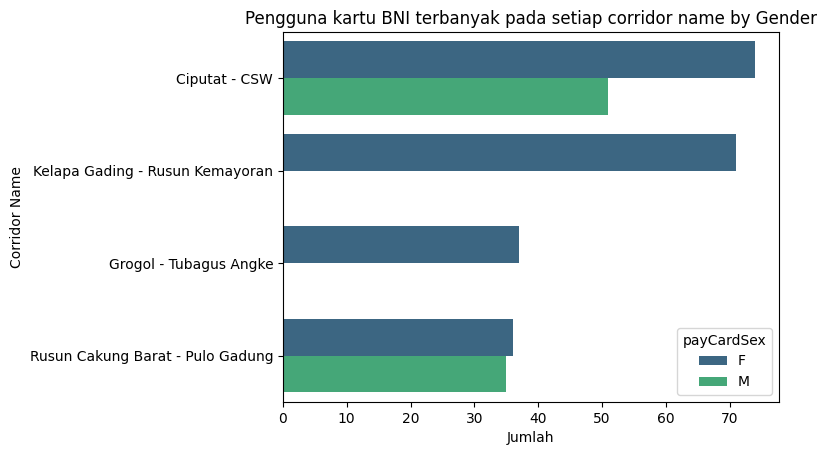

In [ ]:
# Data Visualization
sns.barplot(data=bni_by_gender,x='count',y='corridorName',hue='payCardSex',palette='viridis')
plt.title('Pengguna kartu BNI terbanyak pada setiap corridor name by Gender')
plt.xlabel('Jumlah')
plt.ylabel('Corridor Name')
plt.show()

Dari grafik diatas dapat disimpulkan bahwa :

- Pengunna kartu bni paling banyak pada  Halte Ciputat - CSW adalah Perempuan.
- Pengguna kartu bni paling banyak di halte jurusan Kelapa gading - Rusun Kemayoran adalah perempuan
- Pengguna kartu bni paling banyak di halte Grogol - Tubagus angke adalah perempuan
- Pengguna kartu bni paling banyak di halte jurusan Rusun Cakung Barat - Pulo Gadung adalah perempuan

dapat disimpulkan bahwa sebagian besar pengguna di setiap halte adalah perempuan. ini bisa menjadikan segmen passar berdasarkan jenis kelamin terbanyak untuk pengguna emoney adalah perempuan. Selanjutnya mari kita lihat persebaran emoney berdasarkan usia. 

#### **Mayoritas penggunaan kartu bank BNI pada setiap corridor by `Age Group`**

In [ ]:
top_bni_corridor = ['S21', '2F', 'JAK.60', 'JAK.04']

In [ ]:
selected_df = df[(df['corridorID'].isin(top_bni_corridor)) & (df['payCardBank'] == 'dki')]
kartu_bni_by_age = selected_df.groupby(['corridorID', 'Age Group'])[['Age']].count().reset_index()
kartu_bni_by_age = kartu_bni_by_age.rename(columns={'Age': 'jumlah'})

Text(0.5, 1.0, 'Penggunaan kartu brizzi pada setiap corridor by Age Group')

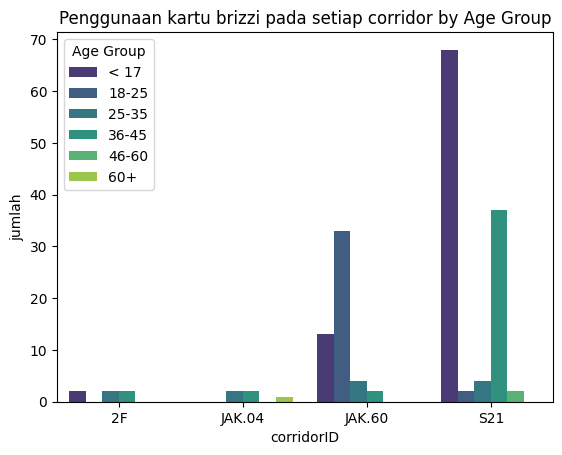

In [ ]:
sns.barplot(data=kartu_bni_by_age,x='corridorID',y='jumlah',hue='Age Group',palette="viridis")
plt.title('Penggunaan kartu brizzi pada setiap corridor by Age Group')

dari grafik di atas dapat kita simpulkan bahwa :

- Pengguna kartu BNI npaling banyak pada coridor 2F adalah pengguna dengan kelompok usia 18-25 tahun
- Pengguna kartu BNI paling banyak pada koridor JAK.04 adalah pengguna dengan kelompok usia 25-35 tahun
- Pengguna kartu BNI paling banyak pada koridor JAK.60 adalah pengguna dengan kelompok usia 18-25 tahun
- Pengguna kartu BNI paling banyak pada koridor S21 adalah pengguna dengan kelompok usia <17> tahun

Persebaran pengguna kartu berdasarkan kelompok usia bervariasi, pengguna emoney terbanyak ada pada koridor 10D dengan rentan usia 60 tahun keatas. Selanjutnya mari kita lihar persebaran pengguna kartu emoney di setiap halte berdasarkan waktu produktifnya.

#### **Aktivitas pada setiap corridor by `tapInDay`**

In [ ]:
jam_prod_bni = df[(df['corridorID'].isin(top_bni_corridor))].groupby(['corridorID','tapInDay'])[['payCardBank']].count().reset_index().rename(columns={'payCardBank' : 'jumlah'})

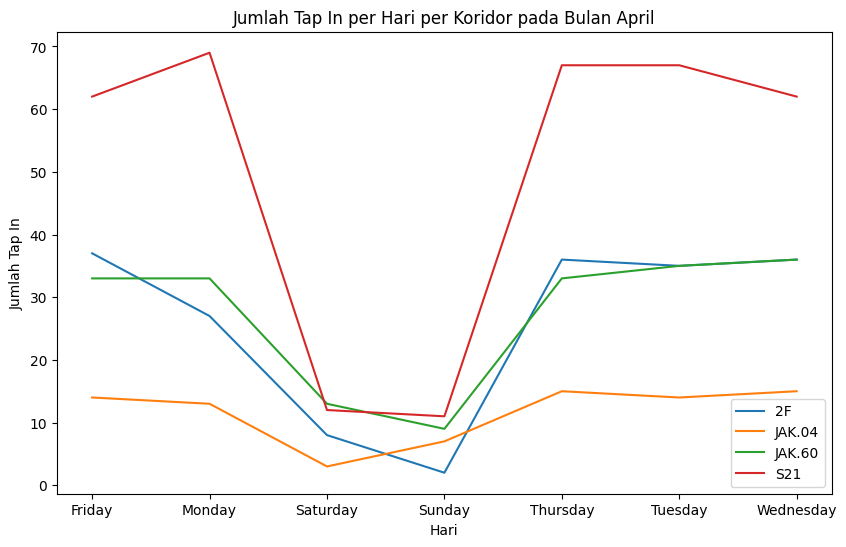

In [ ]:
plt.figure(figsize=(10,6))
corridor_bni = jam_prod_bni['corridorID'].unique()
for corridor_id in corridor_bni:
    sns.lineplot(data=jam_prod_bni[jam_prod_bni['corridorID'] == corridor_id],
                 x='tapInDay',
                 y='jumlah',
                 ci=0,
                 label=corridor_id)
plt.title('Jumlah Tap In per Hari per Koridor pada Bulan April')
plt.xlabel('Hari')
plt.ylabel('Jumlah Tap In')
plt.legend()
plt.show()

Dari grafik diatas dapat dilihat bahwa untuk setiap koridor memiliki jam produktif yang tidak terlalu jauh, dimana selama weekday (senin-jumat) traffic penumpang terlihat padat dan menurun pada saat weekend(sabtu-minggu).

## **Conclusion and Recommendations**

### **Conclusion**

Dari Hasil analisa diatas kita dapat menyumpulkan bahwa : 
* Mayoritas pengguna Transjakarta memakai kartu bank DKI dan Pengguna Transjakarta terbanyak adalah Perempuan.
* Transjakarta banyak digunakan oleh kalangan pelajar dan pekerja dengan Range Usia 18-60 tahun.
* Dari hasil analisa diatas berdasarkan tapInDay dapat disimpulkan bahwa untuk setiap corridor memiliki kepadatan pada saat hari Senin - Jumat (Weekday).

Persebaran Berdasarkan Mayoritas Kartu yang digunakan pada setiap corridor :  

* Untuk corridor yang menggunakan kartu bank **DKI** sebagai kartu bank yang mayoritas ada pada corridor 3B, 8C, 11P, JAK.06, JAK.42, 2, 1T, JAK.08 dengan proporsi gender terbanyaknya adalah Female.
* Untuk corridor yang menggunakan kartu bank **emoney** sebagai kartu bank yang mayoritas ada pada corridor 6H, JAK.64, JAK.49, T11, 6D, JAK.72, 13, S31, 5D, JAK.39 dengan rata-rata gender terbanyaknya adalah Female.
* Untuk corridor yang menggunakan kartu bank **brizzi** sebagai kartu bank yang mayoritas ada pada corridor M7B, 10K, 1H, 1F, 5B, S11, 3H, JAK.28 dengan rata-rata gender terbanyaknya adalah Female.
* Untuk corridor yang menggunakan kartu bank **flazz** sebagai kartu bank yang mayoritas ada pada corridor 10D, JAK.48B, JAK.106, B11, 8M, 7Q, 10B, 9F dengan rata-rata gender terbanyaknya adalah Female.
* Untuk corridor yang menggunakan kartu bank **BNI** sebagai kartu bank yang mayoritas ada pada corridor S21, 2F, JAK.60, JAK.04 dengan rata-rata gender terbanyaknya adalah Female.

### **Recommendations**

* Transjakarta dapat bekerja sama dengan bank DKI,Mandiri,BCA,BNI,BRI untuk memberikan Informasi dari hasil analisa diatas kepada setiap bank untuk merekomendasi berupa pemasangan iklan di beberapa corridor yang telah dianalisa berdasarkan mayortias penggunaan bank di setiap corridornya,dengan segment market berdasarkan Gender,Hari dan Usia,Oleh karena itu Transjakarta dapat meningkatkan pendapatan dari setiap bank untuk pemasangan iklan di setiap corridornya.